# Análisis Exploratorio de Datos: Foodcom Dataset

**Objetivo:** Realizar un análisis exploratorio completo del dataset de Foodcom para comprender la estructura, calidad y patrones en los datos de recetas e interacciones de usuarios.

**Autor:** Data Science Team  
**Fecha:** Noviembre 2025

## 1. Introducción

### 1.1 Descripción del Dataset

El dataset de **Foodcom** es una colección de recetas y reseñas de usuarios provenientes de Food.com (anteriormente GeniusKitchen y Recipezaar). Este dataset contiene información detallada sobre:

- **Recetas:** Incluye nombre, ingredientes, pasos de preparación, tiempo de cocción, información nutricional y etiquetas descriptivas.
- **Interacciones de usuarios:** Contiene las calificaciones (ratings) y reseñas textuales que los usuarios dejaron sobre las recetas.
- **Usuarios:** Información sobre los contribuidores de las recetas.

### 1.2 Casos de Uso Potenciales

Este dataset habilita múltiples aplicaciones en machine learning y data science:

1. **Sistemas de Recomendación:** Recomendar recetas a usuarios basándose en sus preferencias históricas (collaborative filtering, content-based filtering).
2. **Análisis de Sentimientos:** Analizar las reseñas textuales para entender la satisfacción del usuario.
3. **Predicción de Popularidad:** Predecir qué recetas tendrán mayor engagement o mejores calificaciones.
4. **Clasificación de Recetas:** Categorizar recetas por tipo de cocina, dificultad, tiempo de preparación, etc.
5. **Análisis Nutricional:** Identificar patrones entre valores nutricionales y popularidad.

### 1.3 Tipo de Problema

Según el objetivo específico, este dataset puede utilizarse para:

- **Regresión:** Predecir el rating promedio de una receta.
- **Clasificación:** Clasificar recetas en categorías (ej: saludable vs. no saludable).
- **Ranking/Recomendación:** Ordenar recetas por relevancia para un usuario específico.
- **Procesamiento de Lenguaje Natural (NLP):** Análisis de texto en reseñas y descripciones.

La naturaleza del dataset (con interacciones usuario-receta) lo hace especialmente adecuado para **sistemas de recomendación**.

## 2. Carga de Datos y Configuración Inicial

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import ast
from wordcloud import WordCloud
from collections import Counter


# Configuración de visualización
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
# Definir ruta base de los datos (desde la raíz del proyecto)
data_path = Path("data") / "raw" / "foodcom"

# Cargar datasets 
df_recipes_raw = pd.read_csv(data_path / "RAW_recipes.csv")
df_interactions_raw = pd.read_csv(data_path / "RAW_interactions.csv")
df_recipes_pp = pd.read_csv(data_path / "PP_recipes.csv")
df_users = pd.read_csv(data_path / "PP_users.csv")

print("Datasets cargados exitosamente")
print(f"- RAW_recipes: {df_recipes_raw.shape}")
print(f"- RAW_interactions: {df_interactions_raw.shape}")
print(f"- PP_recipes: {df_recipes_pp.shape}")
print(f"- PP_users: {df_users.shape}")

Datasets cargados exitosamente
- RAW_recipes: (231637, 12)
- RAW_interactions: (1132367, 5)
- PP_recipes: (178265, 8)
- PP_users: (25076, 6)


## 3. Entendimiento de las Variables

### 3.1 Dataset de Recetas (RAW_recipes)

In [5]:
# Primeras filas del dataset de recetas
df_recipes_raw.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


In [6]:
# Información general del dataset
print("INFORMACIÓN GENERAL DEL DATASET DE RECETAS")
print("=" * 80)
df_recipes_raw.info()

INFORMACIÓN GENERAL DEL DATASET DE RECETAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


### Diccionario de Variables - Recetas

| Variable | Tipo | Descripción |
|----------|------|-------------|
| **name** | object | Nombre de la receta |
| **id** | int64 | Identificador único de la receta |
| **minutes** | int64 | Tiempo total de preparación en minutos |
| **contributor_id** | int64 | ID del usuario que contribuyó la receta |
| **submitted** | object | Fecha de envío de la receta (formato: YYYY-MM-DD) |
| **tags** | object | Lista de etiquetas descriptivas (ej: 'vegetarian', 'quick', 'mexican') |
| **nutrition** | object | Lista con valores nutricionales: [calorías, grasa total (PDV%), azúcar (PDV%), sodio (PDV%), proteína (PDV%), grasa saturada (PDV%), carbohidratos (PDV%)] |
| **n_steps** | int64 | Número de pasos en la receta |
| **steps** | object | Lista con los pasos de preparación |
| **description** | object | Descripción textual de la receta |
| **ingredients** | object | Lista de ingredientes necesarios |
| **n_ingredients** | int64 | Número de ingredientes en la receta |

*Nota: PDV% = Porcentaje del Valor Diario recomendado*

### 3.2 Dataset de Interacciones (RAW_interactions)

In [12]:
# Primeras filas del dataset de interacciones
df_interactions_raw.head(3)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...


In [13]:
# Información general
print("INFORMACIÓN GENERAL DEL DATASET DE INTERACCIONES")
print("=" * 80)
df_interactions_raw.info()

INFORMACIÓN GENERAL DEL DATASET DE INTERACCIONES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


### Diccionario de Variables - Interacciones

| Variable | Tipo | Descripción |
|----------|------|-------------|
| **user_id** | int64 | Identificador único del usuario |
| **recipe_id** | int64 | Identificador de la receta calificada |
| **date** | object | Fecha de la interacción (formato: YYYY-MM-DD) |
| **rating** | int64 | Calificación otorgada (escala 1-5) |
| **review** | object | Texto de la reseña del usuario |

## 4. Limpieza Básica y Preparación de Datos

### 4.1 Detección de Valores Nulos

In [14]:
# Valores nulos en recetas
print("Valores nulos en dataset de Recetas:")
print(df_recipes_raw.isnull().sum())
print(f"\nPorcentaje de valores nulos por columna:")
print((df_recipes_raw.isnull().sum() / len(df_recipes_raw) * 100).round(2))

Valores nulos en dataset de Recetas:
name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

Porcentaje de valores nulos por columna:
name             0.00
id               0.00
minutes          0.00
contributor_id   0.00
submitted        0.00
tags             0.00
nutrition        0.00
n_steps          0.00
steps            0.00
description      2.15
ingredients      0.00
n_ingredients    0.00
dtype: float64


In [15]:
# Valores nulos en interacciones
print("Valores nulos en dataset de Interacciones:")
print(df_interactions_raw.isnull().sum())
print(f"\nPorcentaje de valores nulos por columna:")
print((df_interactions_raw.isnull().sum() / len(df_interactions_raw) * 100).round(2))

Valores nulos en dataset de Interacciones:
user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

Porcentaje de valores nulos por columna:
user_id     0.00
recipe_id   0.00
date        0.00
rating      0.00
review      0.01
dtype: float64


### 4.2 Detección de Duplicados

In [17]:
# Duplicados en recetas
print(f"Recetas duplicadas (por ID): {df_recipes_raw['id'].duplicated().sum()}")
print(f"Recetas duplicadas (todas las columnas): {df_recipes_raw.duplicated().sum()}")

# Duplicados en interacciones
print(f"\nInteracciones duplicadas (user_id + recipe_id + date): {df_interactions_raw.duplicated(subset=['user_id', 'recipe_id', 'date']).sum()}")
print(f"Interacciones duplicadas (todas las columnas): {df_interactions_raw.duplicated().sum()}")

Recetas duplicadas (por ID): 0
Recetas duplicadas (todas las columnas): 0

Interacciones duplicadas (user_id + recipe_id + date): 0
Interacciones duplicadas (todas las columnas): 0


### 4.3 Conversión de Tipos de Datos

In [18]:
# Crear una copia para trabajar
df_recipes = df_recipes_raw.copy()
df_interactions = df_interactions_raw.copy()

# Convertir fechas
df_recipes['submitted'] = pd.to_datetime(df_recipes['submitted'])
df_interactions['date'] = pd.to_datetime(df_interactions['date'])

# Parsear columnas con listas (tags, nutrition, steps, ingredients)
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) else val
    except:
        return val

df_recipes['tags_list'] = df_recipes['tags'].apply(safe_literal_eval)
df_recipes['nutrition_list'] = df_recipes['nutrition'].apply(safe_literal_eval)
df_recipes['steps_list'] = df_recipes['steps'].apply(safe_literal_eval)
df_recipes['ingredients_list'] = df_recipes['ingredients'].apply(safe_literal_eval)

print("Conversión de tipos completada")

Conversión de tipos completada


In [19]:
# Extraer valores nutricionales individuales
nutrition_cols = ['calorias', 'grasa_total_pdv', 'azucar_pdv', 'sodio_pdv', 'proteina_pdv', 'grasa_saturada_pdv', 'carbohidratos_pdv']

for idx, col in enumerate(nutrition_cols):
    df_recipes[col] = df_recipes['nutrition_list'].apply(lambda x: x[idx] if isinstance(x, list) and len(x) > idx else np.nan)

print("Columnas nutricionales extraídas:")
print(df_recipes[nutrition_cols].head())

Columnas nutricionales extraídas:
   calorias  grasa_total_pdv  azucar_pdv  sodio_pdv  proteina_pdv  \
0     51.50             0.00       13.00       0.00          2.00   
1    173.40            18.00        0.00      17.00         22.00   
2    269.80            22.00       32.00      48.00         39.00   
3    368.10            17.00       10.00       2.00         14.00   
4    352.90             1.00      337.00      23.00          3.00   

   grasa_saturada_pdv  carbohidratos_pdv  
0                0.00               4.00  
1               35.00               1.00  
2               27.00               5.00  
3                8.00              20.00  
4                0.00              28.00  


## 5. Análisis Exploratorio Univariado

### 5.1 Estadísticos Descriptivos - Variables Numéricas

In [21]:
# Estadísticos de variables numéricas principales
numeric_cols = ['minutes', 'n_steps', 'n_ingredients'] + nutrition_cols
df_recipes[numeric_cols].describe()

,minutes,n_steps,n_ingredients,calorias,grasa_total_pdv,azucar_pdv,sodio_pdv,proteina_pdv,grasa_saturada_pdv,carbohidratos_pdv
count,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00
mean,9398.55,9.77,9.05,473.94,36.08,84.30,30.15,34.68,45.59,15.56
std,4461963.04,6.00,3.73,1189.71,77.80,800.08,131.96,58.47,98.24,81.82
min,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,6.00,6.00,174.40,8.00,9.00,5.00,7.00,7.00,4.00
50%,40.00,9.00,9.00,313.40,20.00,25.00,14.00,18.00,23.00,9.00
75%,65.00,12.00,11.00,519.70,41.00,68.00,33.00,51.00,52.00,16.00
max,2147483647.00,145.00,43.00,434360.20,17183.00,362729.00,29338.00,6552.00,10395.00,36098.00


### 5.2 Distribución del Tiempo de Preparación

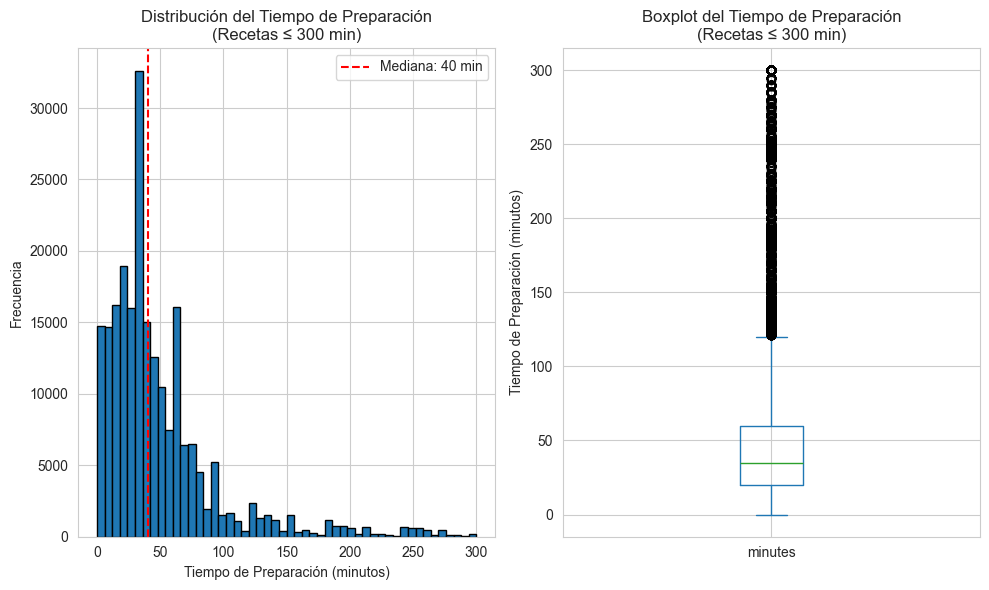

Mediana: 40 minutos
Media: 9399 minutos
Percentil 95: 255 minutos
Recetas con tiempo > 1440 min (24h): 2000 (0.86%)


In [13]:
# Análisis de tiempo de preparación
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Histograma (limitado a 300 minutos para mejor visualización)
df_recipes[df_recipes['minutes'] <= 300]['minutes'].hist(bins=50, ax=axes[0], edgecolor='black')
axes[0].set_xlabel('Tiempo de Preparación (minutos)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución del Tiempo de Preparación\n(Recetas ≤ 300 min)')
axes[0].axvline(df_recipes['minutes'].median(), color='red', linestyle='--', label=f'Mediana: {df_recipes["minutes"].median():.0f} min')
axes[0].legend()

# Boxplot
df_recipes[df_recipes['minutes'] <= 300]['minutes'].plot(kind='box', ax=axes[1])
axes[1].set_ylabel('Tiempo de Preparación (minutos)')
axes[1].set_title('Boxplot del Tiempo de Preparación\n(Recetas ≤ 300 min)')

plt.tight_layout()
plt.show()

# Estadísticos adicionales
print(f"Mediana: {df_recipes['minutes'].median():.0f} minutos")
print(f"Media: {df_recipes['minutes'].mean():.0f} minutos")
print(f"Percentil 95: {df_recipes['minutes'].quantile(0.95):.0f} minutos")
print(f"Recetas con tiempo > 1440 min (24h): {(df_recipes['minutes'] > 1440).sum()} ({(df_recipes['minutes'] > 1440).sum()/len(df_recipes)*100:.2f}%)")

### 5.3 Distribución del Número de Pasos e Ingredientes

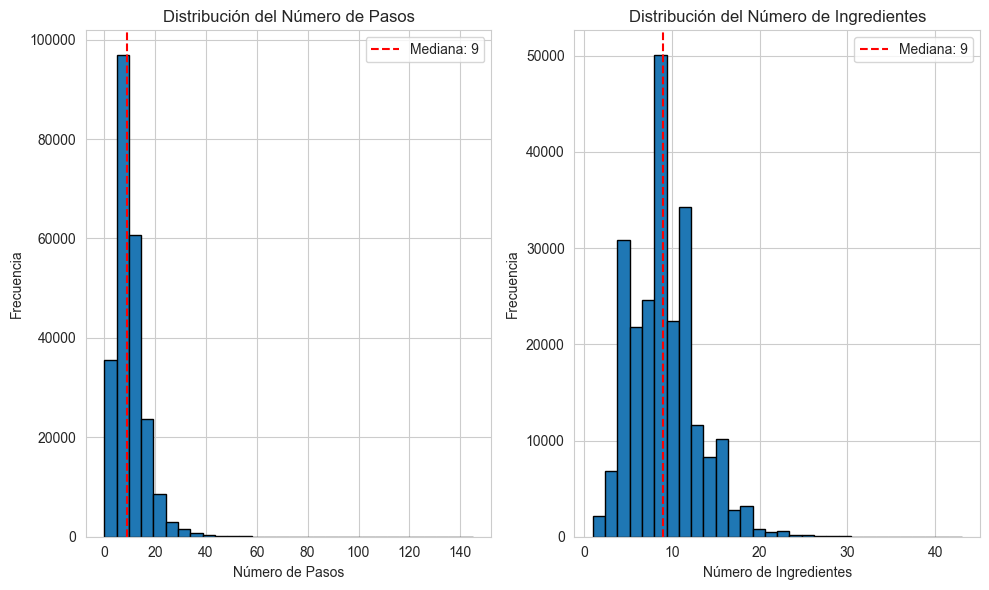

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Número de pasos
df_recipes['n_steps'].hist(bins=30, ax=axes[0], edgecolor='black')
axes[0].set_xlabel('Número de Pasos')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución del Número de Pasos')
axes[0].axvline(df_recipes['n_steps'].median(), color='red', linestyle='--', label=f'Mediana: {df_recipes["n_steps"].median():.0f}')
axes[0].legend()

# Número de ingredientes
df_recipes['n_ingredients'].hist(bins=30, ax=axes[1], edgecolor='black')
axes[1].set_xlabel('Número de Ingredientes')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución del Número de Ingredientes')
axes[1].axvline(df_recipes['n_ingredients'].median(), color='red', linestyle='--', label=f'Mediana: {df_recipes["n_ingredients"].median():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

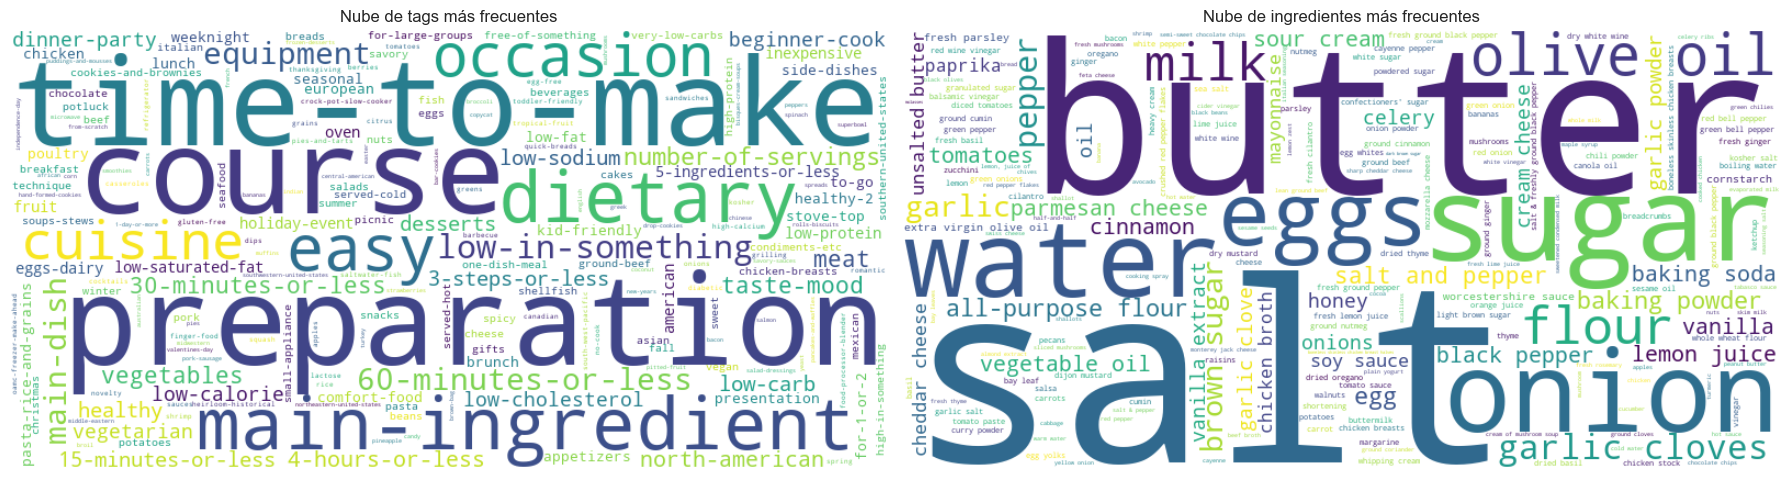

Total de tags únicos: 552
Total de ingredientes únicos: 14,942


In [24]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

all_tags = []
for tags in df_recipes['tags_list'].dropna():
    if isinstance(tags, list):
        all_tags.extend(tags)
tag_counter = Counter(all_tags)
wordcloud_tags = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counter)
axes[0].imshow(wordcloud_tags, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Nube de tags más frecuentes')

all_ingredients = []
for ingr_list in df_recipes['ingredients_list'].dropna():
    if isinstance(ingr_list, list):
        all_ingredients.extend(ingr_list)
ingredient_counter = Counter(all_ingredients)
wordcloud_ingredients = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ingredient_counter)
axes[1].imshow(wordcloud_ingredients, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Nube de ingredientes más frecuentes')

plt.tight_layout()
plt.show()

print(f"Total de tags únicos: {len(tag_counter):,}")
print(f"Total de ingredientes únicos: {len(ingredient_counter):,}")


### 5.4 Distribución de Valores Nutricionales

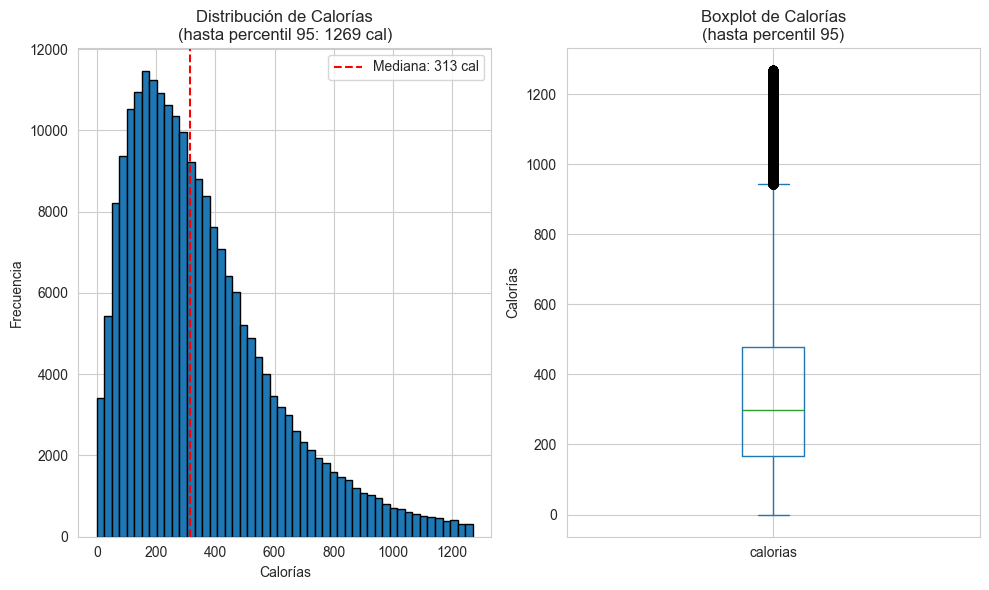

In [25]:
# Distribución de calorías
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Histograma de calorías (limitado a percentil 95)
cal_p95 = df_recipes['calorias'].quantile(0.95)
df_recipes[df_recipes['calorias'] <= cal_p95]['calorias'].hist(bins=50, ax=axes[0], edgecolor='black')
axes[0].set_xlabel('Calorías')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title(f'Distribución de Calorías\n(hasta percentil 95: {cal_p95:.0f} cal)')
axes[0].axvline(df_recipes['calorias'].median(), color='red', linestyle='--', label=f'Mediana: {df_recipes["calorias"].median():.0f} cal')
axes[0].legend()

# Boxplot
df_recipes[df_recipes['calorias'] <= cal_p95]['calorias'].plot(kind='box', ax=axes[1])
axes[1].set_ylabel('Calorías')
axes[1].set_title('Boxplot de Calorías\n(hasta percentil 95)')

plt.tight_layout()
plt.show()

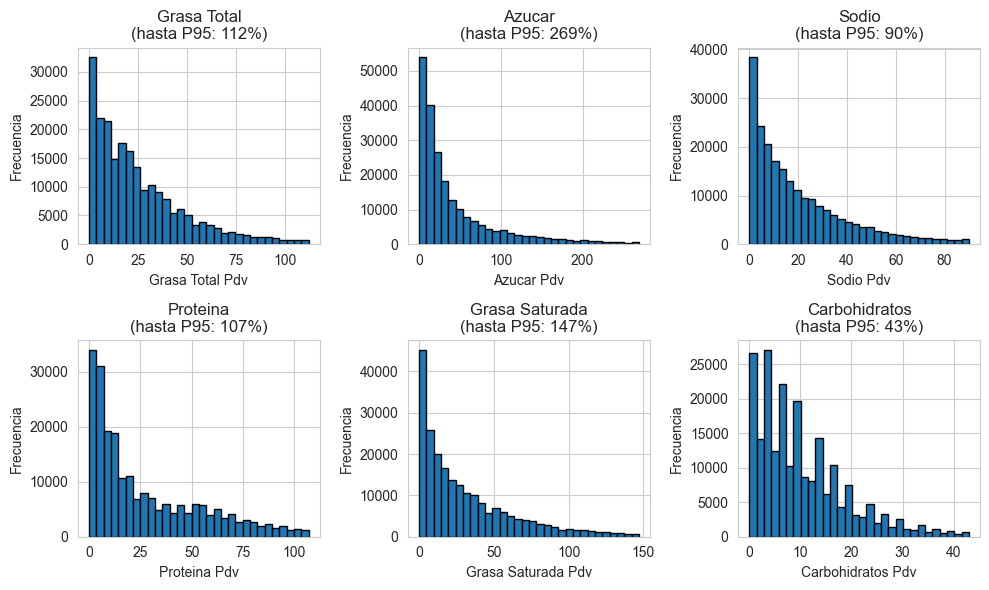

In [26]:
# Distribuciones de otros valores nutricionales (PDV%)
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.ravel()

nutrition_pdv_cols = ['grasa_total_pdv', 'azucar_pdv', 'sodio_pdv', 'proteina_pdv', 'grasa_saturada_pdv', 'carbohidratos_pdv']

for idx, col in enumerate(nutrition_pdv_cols):
    # Limitar a percentil 95 para mejor visualización
    p95 = df_recipes[col].quantile(0.95)
    df_recipes[df_recipes[col] <= p95][col].hist(bins=30, ax=axes[idx], edgecolor='black')
    axes[idx].set_xlabel(col.replace('_', ' ').title())
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].set_title(f'{col.replace("_pdv", "").replace("_", " ").title()}\n(hasta P95: {p95:.0f}%)')

plt.tight_layout()
plt.show()

### 5.5 Análisis Temporal de Envío de Recetas

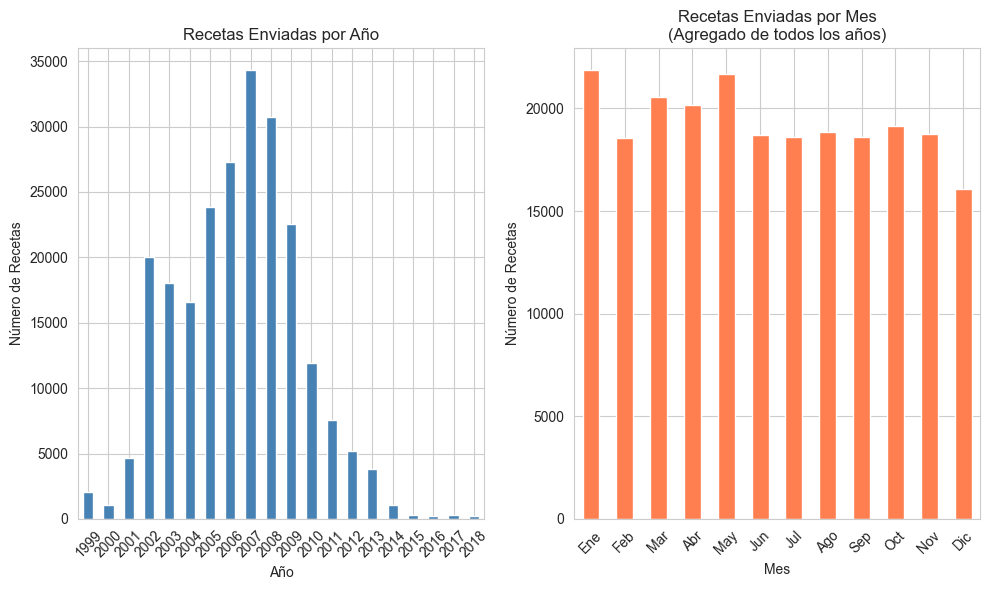

Periodo del dataset: 1999-08-06 a 2018-12-04


In [27]:
# Evolución temporal del número de recetas
df_recipes['year'] = df_recipes['submitted'].dt.year
df_recipes['month'] = df_recipes['submitted'].dt.month

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Por año
recipes_per_year = df_recipes.groupby('year').size()
recipes_per_year.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Número de Recetas')
axes[0].set_title('Recetas Enviadas por Año')
axes[0].tick_params(axis='x', rotation=45)

# Por mes (agregado)
recipes_per_month = df_recipes.groupby('month').size()
recipes_per_month.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Número de Recetas')
axes[1].set_title('Recetas Enviadas por Mes\n(Agregado de todos los años)')
axes[1].set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)

plt.tight_layout()
plt.show()

print(f"Periodo del dataset: {df_recipes['submitted'].min().date()} a {df_recipes['submitted'].max().date()}")

### 5.6 Análisis de Ratings (Interacciones)

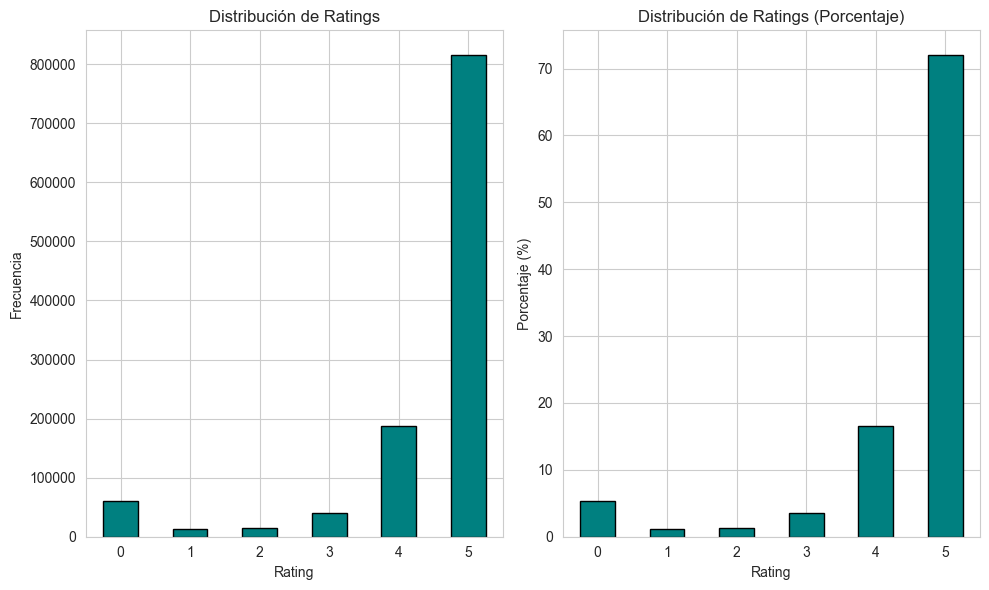

Estadísticas de Ratings:
count   1132367.00
mean          4.41
std           1.26
min           0.00
25%           4.00
50%           5.00
75%           5.00
max           5.00
Name: rating, dtype: float64

Rating promedio: 4.41
Rating mediano: 5


In [28]:
# Distribución de ratings
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Conteo de ratings
rating_counts = df_interactions['rating'].value_counts().sort_index()
rating_counts.plot(kind='bar', ax=axes[0], color='teal', edgecolor='black')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Ratings')
axes[0].tick_params(axis='x', rotation=0)

# Porcentaje
rating_pct = (rating_counts / rating_counts.sum() * 100)
rating_pct.plot(kind='bar', ax=axes[1], color='teal', edgecolor='black')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Porcentaje (%)')
axes[1].set_title('Distribución de Ratings (Porcentaje)')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("Estadísticas de Ratings:")
print(df_interactions['rating'].describe())
print(f"\nRating promedio: {df_interactions['rating'].mean():.2f}")
print(f"Rating mediano: {df_interactions['rating'].median():.0f}")

### 5.7 Tags Más Frecuentes

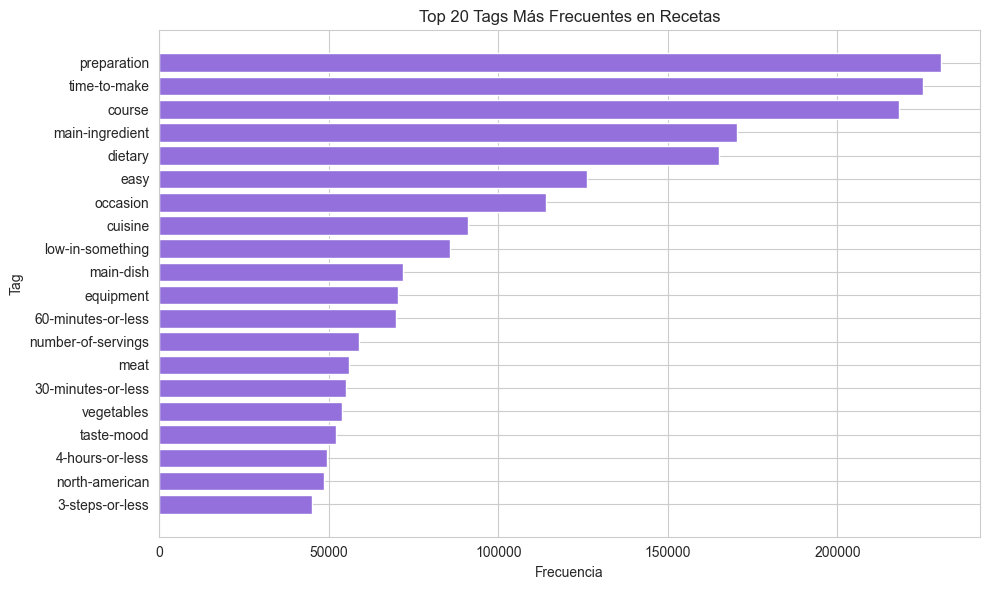

Total de tags únicos: 552


In [19]:
# Extraer todos los tags
from collections import Counter

all_tags = []
for tags in df_recipes['tags_list'].dropna():
    if isinstance(tags, list):
        all_tags.extend(tags)

tag_counter = Counter(all_tags)
top_tags = pd.DataFrame(tag_counter.most_common(20), columns=['tag', 'frecuencia'])

# Visualización
plt.figure(figsize=(10, 6))
plt.barh(top_tags['tag'], top_tags['frecuencia'], color='mediumpurple')
plt.xlabel('Frecuencia')
plt.ylabel('Tag')
plt.title('Top 20 Tags Más Frecuentes en Recetas')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"Total de tags únicos: {len(tag_counter)}")

## 6. Análisis Exploratorio Bivariado y Multivariado

### 6.1 Matriz de Correlación - Variables Numéricas

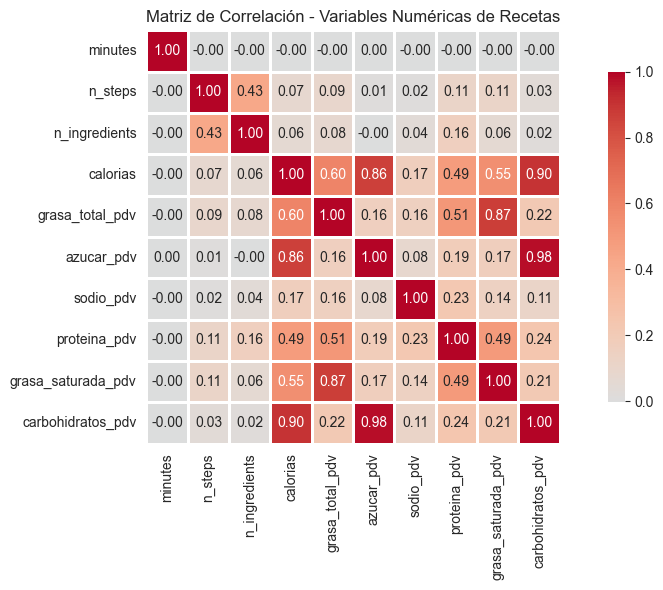

In [20]:
# Calcular matriz de correlación
correlation_matrix = df_recipes[numeric_cols].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas de Recetas')
plt.tight_layout()
plt.show()

### 6.2 Relación entre Rating y Características de Recetas

In [21]:
# Unir recetas con ratings promedio
recipe_ratings = df_interactions.groupby('recipe_id').agg({
    'rating': ['mean', 'count']
}).reset_index()
recipe_ratings.columns = ['id', 'rating_promedio', 'num_ratings']

# Merge con dataset de recetas
df_recipes_with_ratings = df_recipes.merge(recipe_ratings, on='id', how='left')

print(f"Recetas con al menos un rating: {df_recipes_with_ratings['rating_promedio'].notna().sum()}")
print(f"Recetas sin ratings: {df_recipes_with_ratings['rating_promedio'].isna().sum()}")

Recetas con al menos un rating: 231637
Recetas sin ratings: 0


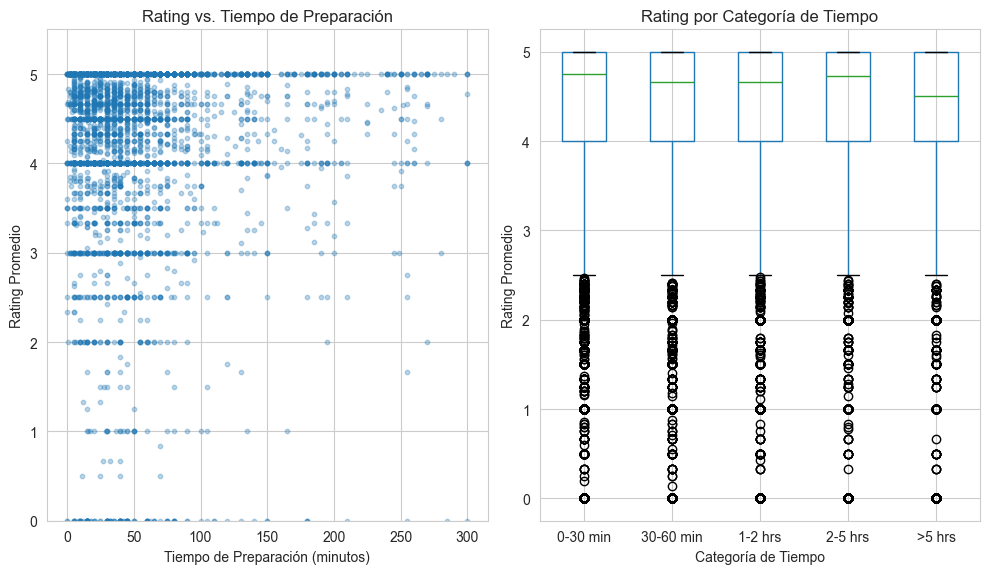

In [22]:
# Relación rating vs tiempo de preparación
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Scatter plot (filtrado)
df_plot = df_recipes_with_ratings[(df_recipes_with_ratings['rating_promedio'].notna()) & 
                                   (df_recipes_with_ratings['minutes'] <= 300)].sample(min(5000, len(df_recipes_with_ratings)))
axes[0].scatter(df_plot['minutes'], df_plot['rating_promedio'], alpha=0.3, s=10)
axes[0].set_xlabel('Tiempo de Preparación (minutos)')
axes[0].set_ylabel('Rating Promedio')
axes[0].set_title('Rating vs. Tiempo de Preparación')
axes[0].set_ylim([0, 5.5])

# Boxplot por rangos de tiempo
df_recipes_with_ratings['tiempo_categoria'] = pd.cut(df_recipes_with_ratings['minutes'], 
                                                       bins=[0, 30, 60, 120, 300, float('inf')],
                                                       labels=['0-30 min', '30-60 min', '1-2 hrs', '2-5 hrs', '>5 hrs'])
df_recipes_with_ratings[df_recipes_with_ratings['rating_promedio'].notna()].boxplot(column='rating_promedio', 
                                                                                      by='tiempo_categoria', 
                                                                                      ax=axes[1])
axes[1].set_xlabel('Categoría de Tiempo')
axes[1].set_ylabel('Rating Promedio')
axes[1].set_title('Rating por Categoría de Tiempo')
plt.suptitle('')

plt.tight_layout()
plt.show()

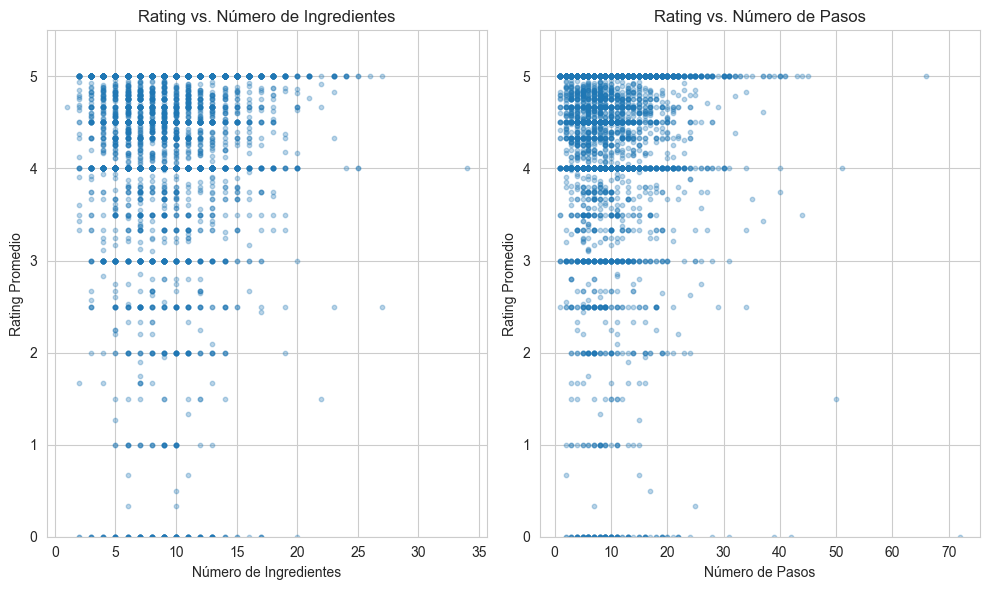

In [23]:
# Relación rating vs número de ingredientes y pasos
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Rating vs número de ingredientes
df_plot = df_recipes_with_ratings[df_recipes_with_ratings['rating_promedio'].notna()].sample(min(5000, len(df_recipes_with_ratings)))
axes[0].scatter(df_plot['n_ingredients'], df_plot['rating_promedio'], alpha=0.3, s=10)
axes[0].set_xlabel('Número de Ingredientes')
axes[0].set_ylabel('Rating Promedio')
axes[0].set_title('Rating vs. Número de Ingredientes')
axes[0].set_ylim([0, 5.5])

# Rating vs número de pasos
axes[1].scatter(df_plot['n_steps'], df_plot['rating_promedio'], alpha=0.3, s=10)
axes[1].set_xlabel('Número de Pasos')
axes[1].set_ylabel('Rating Promedio')
axes[1].set_title('Rating vs. Número de Pasos')
axes[1].set_ylim([0, 5.5])

plt.tight_layout()
plt.show()

### 6.3 Relación entre Calorías y Rating

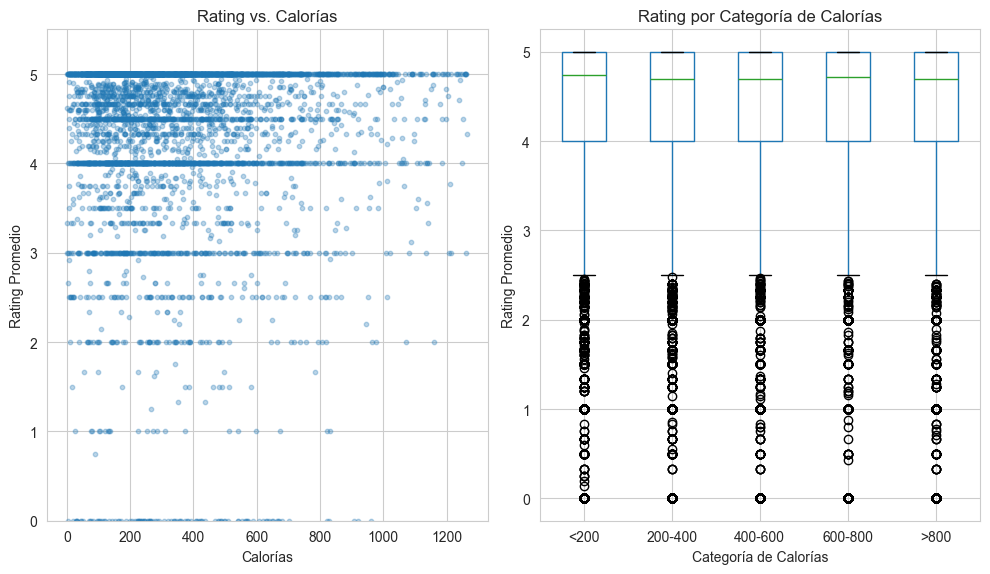

In [24]:
# Rating vs calorías
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

df_plot = df_recipes_with_ratings[(df_recipes_with_ratings['rating_promedio'].notna()) & 
                                   (df_recipes_with_ratings['calorias'] <= df_recipes_with_ratings['calorias'].quantile(0.95))].sample(min(5000, len(df_recipes_with_ratings)))

axes[0].scatter(df_plot['calorias'], df_plot['rating_promedio'], alpha=0.3, s=10)
axes[0].set_xlabel('Calorías')
axes[0].set_ylabel('Rating Promedio')
axes[0].set_title('Rating vs. Calorías')
axes[0].set_ylim([0, 5.5])

# Categorizar por calorías
df_recipes_with_ratings['calorias_categoria'] = pd.cut(df_recipes_with_ratings['calorias'], 
                                                         bins=[0, 200, 400, 600, 800, float('inf')],
                                                         labels=['<200', '200-400', '400-600', '600-800', '>800'])
df_recipes_with_ratings[df_recipes_with_ratings['rating_promedio'].notna()].boxplot(column='rating_promedio', 
                                                                                      by='calorias_categoria', 
                                                                                      ax=axes[1])
axes[1].set_xlabel('Categoría de Calorías')
axes[1].set_ylabel('Rating Promedio')
axes[1].set_title('Rating por Categoría de Calorías')
plt.suptitle('')

plt.tight_layout()
plt.show()

### 6.4 Popularidad de Recetas (Número de Interacciones)

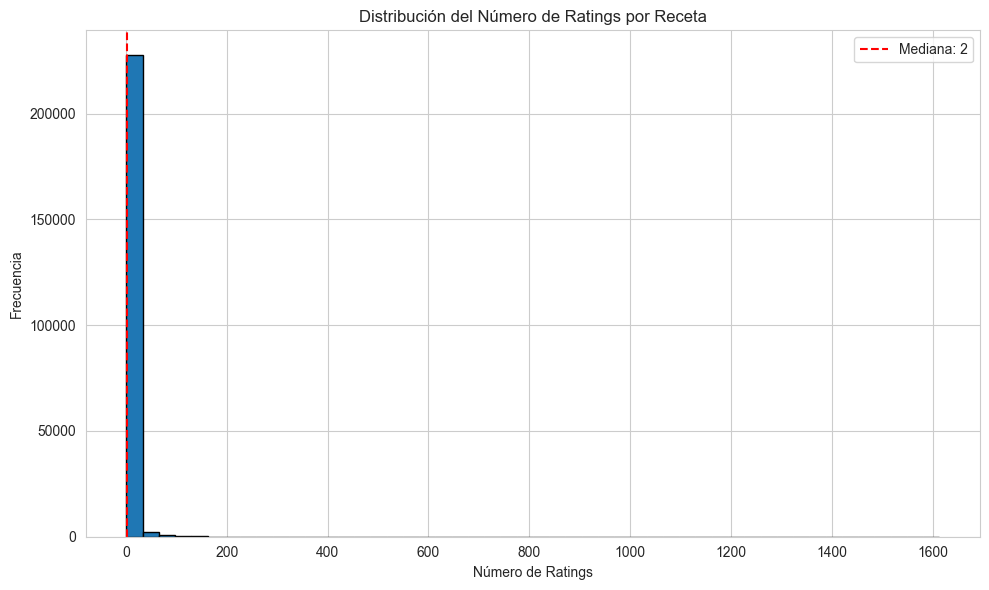

Estadísticas del número de ratings por receta:
count   231637.00
mean         4.89
std         17.53
min          1.00
25%          1.00
50%          2.00
75%          4.00
max       1613.00
Name: num_ratings, dtype: float64

Recetas con más de 100 ratings: 769


In [25]:
# Distribución del número de ratings por receta
plt.figure(figsize=(10, 6))
df_recipes_with_ratings[df_recipes_with_ratings['num_ratings'].notna()]['num_ratings'].hist(bins=50, edgecolor='black')
plt.xlabel('Número de Ratings')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Ratings por Receta')
plt.axvline(df_recipes_with_ratings['num_ratings'].median(), color='red', linestyle='--', 
            label=f'Mediana: {df_recipes_with_ratings["num_ratings"].median():.0f}')
plt.legend()
plt.tight_layout()
plt.show()

print("Estadísticas del número de ratings por receta:")
print(df_recipes_with_ratings['num_ratings'].describe())
print(f"\nRecetas con más de 100 ratings: {(df_recipes_with_ratings['num_ratings'] > 100).sum()}")

### 6.5 Análisis de Actividad de Usuarios

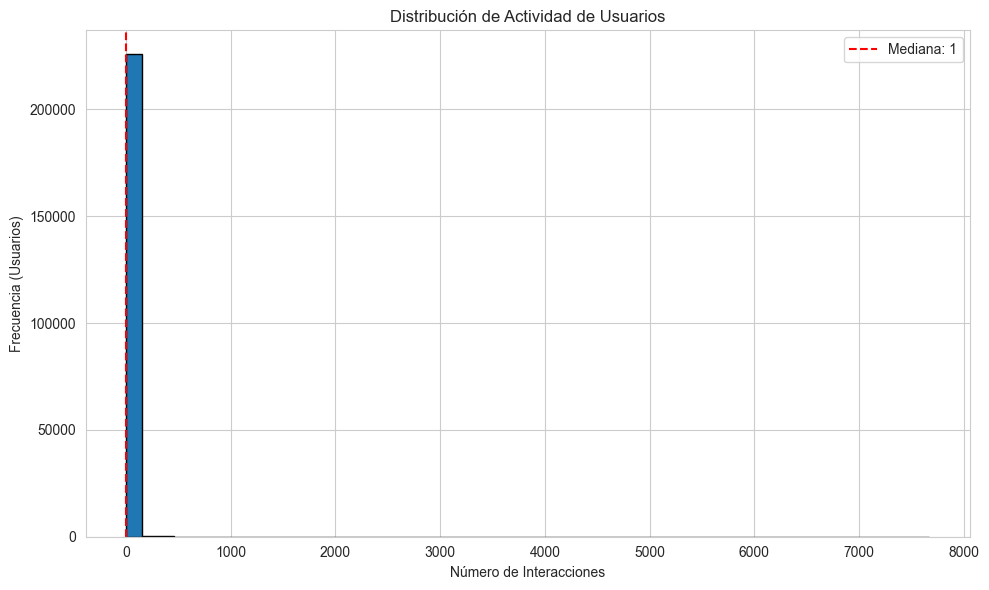

Estadísticas de actividad de usuarios:
count   226570.00
mean         5.00
std         49.66
min          1.00
25%          1.00
50%          1.00
75%          2.00
max       7671.00
Name: num_interacciones, dtype: float64

Usuarios con más de 50 interacciones: 2696
Usuarios con más de 100 interacciones: 1368


In [26]:
# Número de interacciones por usuario
user_activity = df_interactions.groupby('user_id').size().reset_index(name='num_interacciones')

plt.figure(figsize=(10, 6))
user_activity['num_interacciones'].hist(bins=50, edgecolor='black')
plt.xlabel('Número de Interacciones')
plt.ylabel('Frecuencia (Usuarios)')
plt.title('Distribución de Actividad de Usuarios')
plt.axvline(user_activity['num_interacciones'].median(), color='red', linestyle='--', 
            label=f'Mediana: {user_activity["num_interacciones"].median():.0f}')
plt.legend()
plt.tight_layout()
plt.show()

print("Estadísticas de actividad de usuarios:")
print(user_activity['num_interacciones'].describe())
print(f"\nUsuarios con más de 50 interacciones: {(user_activity['num_interacciones'] > 50).sum()}")
print(f"Usuarios con más de 100 interacciones: {(user_activity['num_interacciones'] > 100).sum()}")

## 7. Calidad de Datos

### 7.1 Análisis de Valores Faltantes

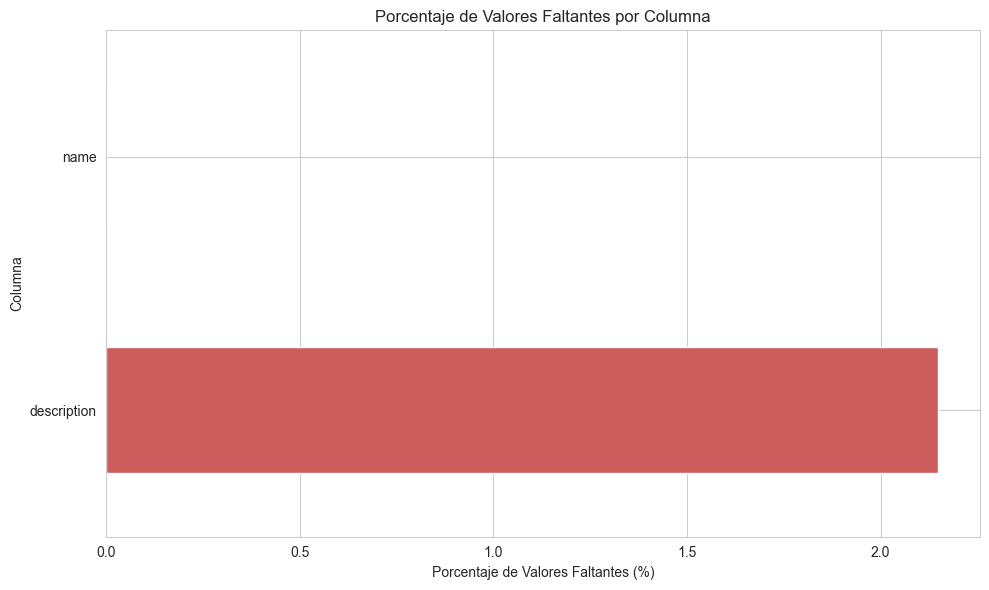

In [27]:
# Visualización de valores faltantes
missing_data = df_recipes.isnull().sum()
missing_pct = (missing_data / len(df_recipes) * 100).sort_values(ascending=False)

# Filtrar solo columnas con valores faltantes
missing_pct_filtered = missing_pct[missing_pct > 0]

if len(missing_pct_filtered) > 0:
    plt.figure(figsize=(10, 6))
    missing_pct_filtered.plot(kind='barh', color='indianred')
    plt.xlabel('Porcentaje de Valores Faltantes (%)')
    plt.ylabel('Columna')
    plt.title('Porcentaje de Valores Faltantes por Columna')
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores faltantes en el dataset de recetas.")

### 7.2 Detección de Outliers

Análisis de valores atípicos en variables clave.

In [28]:
# Función para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Análisis de outliers en variables principales
outlier_analysis = []
for col in ['minutes', 'n_steps', 'n_ingredients', 'calorias']:
    outliers, lower, upper = detect_outliers_iqr(df_recipes, col)
    outlier_analysis.append({
        'variable': col,
        'num_outliers': len(outliers),
        'pct_outliers': len(outliers) / len(df_recipes) * 100,
        'lower_bound': lower,
        'upper_bound': upper
    })

outlier_df = pd.DataFrame(outlier_analysis)
print("Análisis de Outliers (método IQR):")
print(outlier_df.to_string(index=False))

Análisis de Outliers (método IQR):
     variable  num_outliers  pct_outliers  lower_bound  upper_bound
      minutes         23714         10.24       -47.50       132.50
      n_steps         10018          4.32        -3.00        21.00
n_ingredients          3770          1.63        -1.50        18.50
     calorias         15737          6.79      -343.55      1037.65


In [29]:
# Ejemplos de outliers extremos
print("Ejemplos de recetas con tiempos extremos:")
print("\nTop 5 recetas con mayor tiempo de preparación:")
print(df_recipes.nlargest(5, 'minutes')[['name', 'minutes', 'n_steps', 'n_ingredients']])

print("\nTop 5 recetas con más ingredientes:")
print(df_recipes.nlargest(5, 'n_ingredients')[['name', 'minutes', 'n_steps', 'n_ingredients']])

Ejemplos de recetas con tiempos extremos:

Top 5 recetas con mayor tiempo de preparación:
                                                 name     minutes  n_steps  \
144074                          no bake granola balls  2147483647        9   
109624                      how to preserve a husband     1051200        9   
106563                         homemade fruit liquers      288000       12   
38116   celtic druid s honey mead   meade   metheglin      259260       18   
106963                               homemade vanilla      259205        9   

        n_ingredients  
144074              8  
109624              2  
106563              3  
38116               7  
106963              2  

Top 5 recetas con más ingredientes:
                                                     name  minutes  n_steps  \
2162                                         a to z bread       80       12   
139659                             morton thompson turkey      330       39   
230245                 

### 7.3 Sesgo en los Datos

Análisis de posibles sesgos en el dataset.

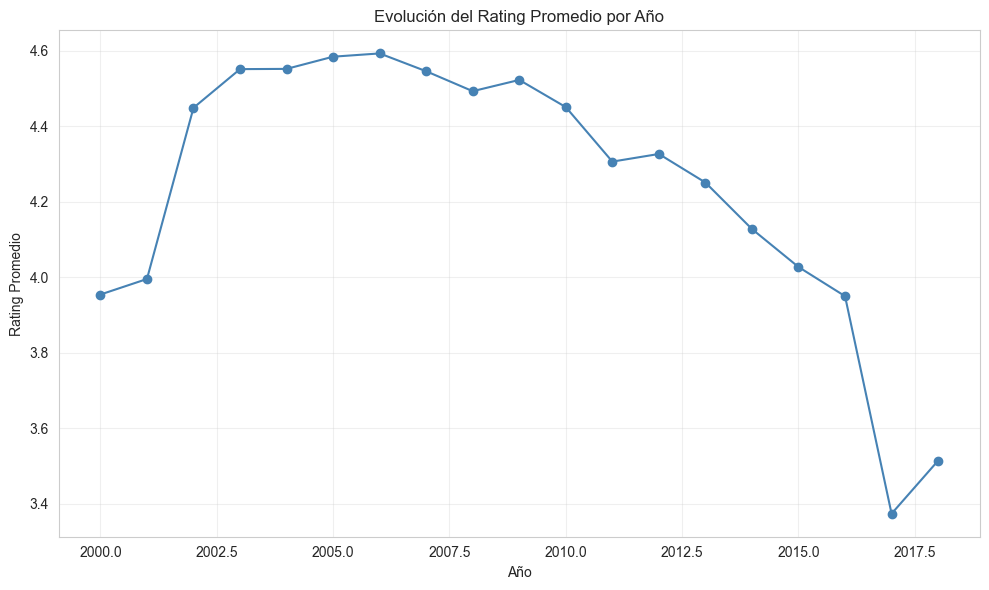

Observaciones sobre sesgo:
- Rating promedio general: 4.41
- Porcentaje de ratings 5 estrellas: 72.09%
- Porcentaje de ratings 1 estrella: 1.13%

Posible sesgo positivo: Alta concentración de ratings 5 estrellas.


In [30]:
# Sesgo temporal: Distribución de ratings a lo largo del tiempo
df_interactions['year'] = df_interactions['date'].dt.year
ratings_per_year = df_interactions.groupby('year')['rating'].mean()

plt.figure(figsize=(10, 6))
ratings_per_year.plot(kind='line', marker='o', color='steelblue')
plt.xlabel('Año')
plt.ylabel('Rating Promedio')
plt.title('Evolución del Rating Promedio por Año')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Observaciones sobre sesgo:")
print(f"- Rating promedio general: {df_interactions['rating'].mean():.2f}")
print(f"- Porcentaje de ratings 5 estrellas: {(df_interactions['rating'] == 5).sum() / len(df_interactions) * 100:.2f}%")
print(f"- Porcentaje de ratings 1 estrella: {(df_interactions['rating'] == 1).sum() / len(df_interactions) * 100:.2f}%")
print("\nPosible sesgo positivo: Alta concentración de ratings 5 estrellas.")

## 8. Hallazgos y Conclusiones

### 8.1 Principales Patrones Detectados

**Distribución de datos:**
- El dataset contiene un volumen significativo de recetas e interacciones, con suficiente densidad para aplicaciones de machine learning.
- La mayoría de las recetas tienen tiempos de preparación razonables (mediana alrededor de 35-40 minutos), aunque existen outliers extremos.
- Las recetas típicas tienen entre 6-9 ingredientes y 8-10 pasos de preparación.

**Comportamiento de usuarios:**
- Existe un **sesgo positivo muy marcado** en los ratings: la mayoría son 5 estrellas.
- La distribución de actividad de usuarios es altamente asimétrica: pocos usuarios muy activos y muchos usuarios con pocas interacciones (distribución de ley de potencia).
- Las recetas populares (con muchos ratings) tienden a tener calificaciones altas, pero esto puede estar influenciado por el sesgo general.

**Información nutricional:**
- Hay una gran variabilidad en los valores nutricionales, con muchos outliers en calorías y otros indicadores.
- No se observa una correlación fuerte entre calorías y rating, lo que sugiere que la preferencia de los usuarios no está dominada únicamente por aspectos nutricionales.

**Características temporales:**
- El dataset cubre varios años, con variaciones en la cantidad de recetas enviadas por año.
- No se observan tendencias claras de cambio en los ratings promedio a lo largo del tiempo.

### 8.2 Problemas de Calidad de Datos

**Valores faltantes:**
- El dataset de recetas está prácticamente completo, con muy pocos valores faltantes.
- En interacciones, las reseñas textuales pueden estar vacías en algunos casos, lo cual es normal.

**Outliers:**
- Existen outliers extremos en tiempo de preparación (recetas con miles de minutos).
- Algunos valores nutricionales tienen outliers que deben revisarse para determinar si son errores o casos legítimos.
- **Recomendación:** Aplicar filtros o transformaciones (ej: log, winsorización) antes del modelado.

**Sesgo en ratings:**
- El fuerte sesgo hacia ratings altos puede afectar el entrenamiento de modelos de recomendación.
- **Recomendación:** Considerar técnicas de balanceo o usar métricas de evaluación apropiadas (ej: ranking metrics en lugar de RMSE).

**Datos estructurados como strings:**
- Tags, ingredientes, pasos y valores nutricionales vienen como strings que representan listas, requiriendo parsing.
- Este procesamiento ya se realizó en este notebook, pero debe integrarse en cualquier pipeline de preprocesamiento.

### 8.3 Features Interesantes para Modelado

**Features existentes:**
- Información nutricional completa (7 indicadores).
- Complejidad de receta (n_steps, n_ingredients, minutes).
- Tags descriptivos (más de 500 tags únicos para embeddings o one-hot encoding selectivo).
- Información temporal (año, mes de envío).

**Features derivados potenciales:**
- **Popularidad de receta:** Número de interacciones, ratio de ratings positivos.
- **Características textuales:** Embeddings de descripciones y reseñas (TF-IDF, Word2Vec, BERT).
- **Características de ingredientes:** Frecuencia de ingredientes específicos, combinaciones comunes.
- **Indicadores de salud:** Clasificación binaria de recetas saludables basada en umbrales nutricionales.
- **Complejidad normalizada:** Ratio pasos/ingredientes, tiempo/pasos.
- **Actividad de usuario:** Número de reseñas, rating promedio dado por usuario, desviación estándar de sus ratings.

### 8.4 Siguientes Pasos Recomendados

1. **Feature Engineering:**
   - Crear features derivados mencionados anteriormente.
   - Aplicar técnicas de NLP en descripciones y reseñas.
   - Extraer embeddings de tags usando técnicas de aprendizaje no supervisado.

2. **Preprocesamiento para Modelado:**
   - Manejar outliers (clipping, transformaciones logarítmicas).
   - Normalizar/estandarizar variables numéricas.
   - Codificar variables categóricas (tags, ingredientes).

3. **Modelado:**
   - **Sistema de Recomendación:** Implementar baselines (popularity-based, collaborative filtering con ALS o SVD).
   - **Predicción de Ratings:** Probar modelos de regresión (XGBoost, LightGBM) con features combinados.
   - **Clasificación:** Clasificar recetas por categoría (usando tags como labels).

4. **Evaluación:**
   - Usar métricas apropiadas: NDCG, MAP, Precision@K para recomendación; RMSE/MAE para predicción de ratings.
   - Validación temporal: Entrenar en datos históricos, validar en datos recientes.

5. **Análisis Adicional:**
   - Clustering de recetas para identificar grupos naturales.
   - Análisis de sentimientos en reseñas textuales.
   - Identificar factores clave de éxito de recetas (mediante feature importance).